In [1]:
import os
import json
from segmentation import vectorize, save_glyphs, plot_breakpoints
from collocations import get_bigram_collocations, get_trigram_collocations, get_similar_glyphs
from processing import load_file, clean_lines, encode_lines, split_sequences
from nearest_neighbor import analyze_glyphs, glyph_bound
from discourse import plot_discourse
from search import search_glyphs

In [2]:
raw_data = load_file('data/I.csv')
clean_data = clean_lines(raw_data)
encoded_data = encode_lines(clean_data)
_, sequences = split_sequences(encoded_data)

In [3]:
bigrams = get_bigram_collocations(sequences)
bigrams

[(('600.6', '<76>'), 91.66561699388905),
 (('90', '<76>'), 83.29395180120439),
 (('430', '<76>'), 44.13056528393919),
 (('76', '<76>'), 19.02670807258992),
 (('99', '<76>'), 15.2804556133917),
 (('1v', '<76>'), 15.145269032940053),
 (('90.21', '<76>'), 15.134770715157574),
 (('633', '<76>'), 14.376726019449983),
 (('700', '<76>'), 14.038580265928879),
 (('290.6', '<76>'), 11.345243097221022),
 (('<76>', '532'), 81.32697487910262),
 (('<76>', '71'), 56.54519644632962),
 (('<76>', '11'), 53.443623416815726),
 (('<76>', '70'), 44.320985058320126),
 (('<76>', '75'), 27.961693473703875),
 (('<76>', '4f'), 25.65769629575744),
 (('<76>', '10.79f'), 20.822028244697165),
 (('<76>', '57'), 18.928205430547038),
 (('<76>', '2a.10'), 18.71476549029873),
 (('<76>', '6'), 18.71476549029873),
 (('600', '</s>'), 28.306911166315523),
 (('270.6', '</s>'), 11.202344333977038),
 (('90', '</s>'), 11.146652773836397),
 (('200.10', '</s>'), 8.025854860181934),
 (('40.290', '</s>'), 7.559612269907353),
 (('513

In [4]:
trigrams = get_trigram_collocations(sequences)
trigrams

[(('600.6', '<76>', '532'), 174.7513979894028),
 (('90', '<76>', '532'), 165.5804366436831),
 (('90', '<76>', '71'), 141.09618527886911),
 (('600.6', '<76>', '70'), 139.69633706343006),
 (('90', '<76>', '11'), 137.1218953541225),
 (('90', '<76>', '70'), 135.73538291313105),
 (('430', '<76>', '532'), 127.82945963598927),
 (('90', '<76>', '21.1'), 116.26939501369625),
 (('600.6', '<76>', '71.61'), 110.08571110033373),
 (('90', '<76>', '57'), 105.02161087698299)]

In [5]:
_, percentages = get_similar_glyphs(sequences)
percentages

{'XYX': 0.05011389521640091,
 'XXZ': 0.04328018223234624,
 'XYY': 0.029612756264236904}

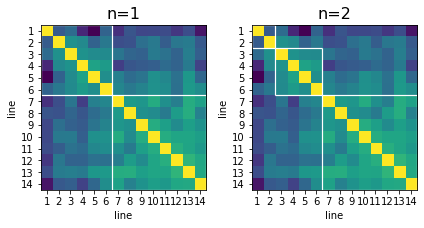

In [6]:
vectorized_text, vectorizer = vectorize(encoded_data)
bkpts = plot_breakpoints(vectorized_text, [1, 2])

In [7]:
glyphs = save_glyphs(vectorized_text, vectorizer, bkpts)
glyphs

[['270', '430', '90.76', '200.6.76', '700.76', '755.76'],
 ['55', '200.10.76', '90.76', '11', '71'],
 ['700.76', '200.6.76'],
 ['755.76', '90.76', '270', '430'],
 ['55', '200.10.76', '90.76', '11', '71']]

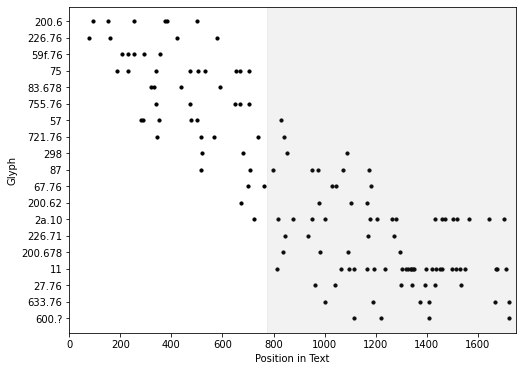

In [8]:
clustered_glyphs, _ = analyze_glyphs(encoded_data)
plot_discourse(clustered_glyphs, encoded_data, bkpt=bkpts[0][0])

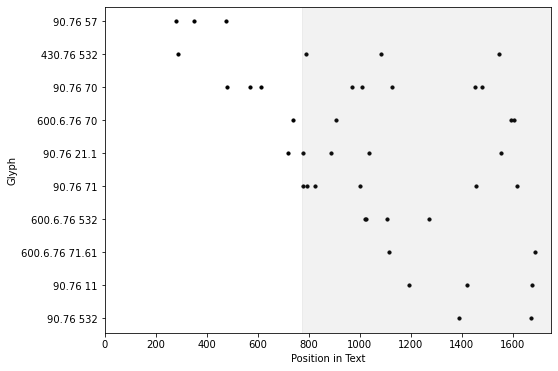

In [9]:
trigrams_formatted = [[f'{trigram[0][0]}.76', trigram[0][2]] for trigram in trigrams]
trigrams_sorted = sorted(trigrams_formatted, key=lambda x: glyph_bound(x, encoded_data))
plot_discourse(trigrams_sorted, encoded_data, bkpt=bkpts[0][0])

In [10]:
XY = [(trigram[0][0], trigram[0][2]) for trigram in trigrams]
search_results = search_glyphs(XY)
search_results

{'90 532': ['Aa1', 'Aa2'],
 '90 71': ['Ev2'],
 '90 11': ['Aa2'],
 '90 70': ['Sb8', 'Aa2']}